In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

In [2]:
df = pd.read_csv('./data/machine_status.csv')
X = pd.get_dummies(df.drop(['Status'], axis=1))
y = df['Status']

missing_dataset = df.isna().mean()
missing_dataset = missing_dataset.to_frame()
display(missing_dataset.describe())


,0
count,8.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [4]:
model = XGBClassifier(
    n_estimators=500,    # Number of trees
    learning_rate=0.01,   # Learning rate for boosting
    max_depth=8,         # Maximum depth of a tree
    subsample=0.6,       # Subsample ratio of training instances
    colsample_bytree=0.6, # Subsample ratio of columns when constructing each tree
    random_state=42,     # Random seed for reproducibility
    use_label_encoder=False, # Disable label encoding for versions 1.3 and later
    eval_metric='logloss' # Evaluation metric
)

In [5]:
model.fit(X_train, y_train,eval_set=[(X_train, y_train),(X_test, y_test)])

[0]	validation_0-logloss:0.68013	validation_1-logloss:0.67991
[1]	validation_0-logloss:0.67050	validation_1-logloss:0.67025
[2]	validation_0-logloss:0.66106	validation_1-logloss:0.66079
[3]	validation_0-logloss:0.65182	validation_1-logloss:0.65154
[4]	validation_0-logloss:0.64511	validation_1-logloss:0.64534
[5]	validation_0-logloss:0.63618	validation_1-logloss:0.63638
[6]	validation_0-logloss:0.62741	validation_1-logloss:0.62760
[7]	validation_0-logloss:0.61879	validation_1-logloss:0.61895
[8]	validation_0-logloss:0.61034	validation_1-logloss:0.61049
[9]	validation_0-logloss:0.60724	validation_1-logloss:0.60835
[10]	validation_0-logloss:0.59901	validation_1-logloss:0.60009
[11]	validation_0-logloss:0.59306	validation_1-logloss:0.59466
[12]	validation_0-logloss:0.58717	validation_1-logloss:0.58930
[13]	validation_0-logloss:0.58126	validation_1-logloss:0.58367
[14]	validation_0-logloss:0.57351	validation_1-logloss:0.57587
[15]	validation_0-logloss:0.56804	validation_1-logloss:0.57086
[1

c:\Users\diass\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:30:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[58]	validation_0-logloss:0.36868	validation_1-logloss:0.37745
[59]	validation_0-logloss:0.36431	validation_1-logloss:0.37298
[60]	validation_0-logloss:0.36145	validation_1-logloss:0.37045
[61]	validation_0-logloss:0.35718	validation_1-logloss:0.36609
[62]	validation_0-logloss:0.35298	validation_1-logloss:0.36178
[63]	validation_0-logloss:0.34886	validation_1-logloss:0.35758
[64]	validation_0-logloss:0.34659	validation_1-logloss:0.35535
[65]	validation_0-logloss:0.34438	validation_1-logloss:0.35314
[66]	validation_0-logloss:0.34256	validation_1-logloss:0.35165
[67]	validation_0-logloss:0.34116	validation_1-logloss:0.35070
[68]	validation_0-logloss:0.33720	validation_1-logloss:0.34664
[69]	validation_0-logloss:0.33445	validation_1-logloss:0.34422
[70]	validation_0-logloss:0.33056	validation_1-logloss:0.34023
[71]	validation_0-logloss:0.32926	validation_1-logloss:0.33939
[72]	validation_0-logloss:0.32714	validation_1-logloss:0.33739
[73]	validation_0-logloss:0.32337	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [6]:
y_val_pred = model.predict(X_test)

Validation Accuracy: 1.0000
Validation Recall: 1.0000
Confusion Matrix:
[[190   0]
 [  0 161]]


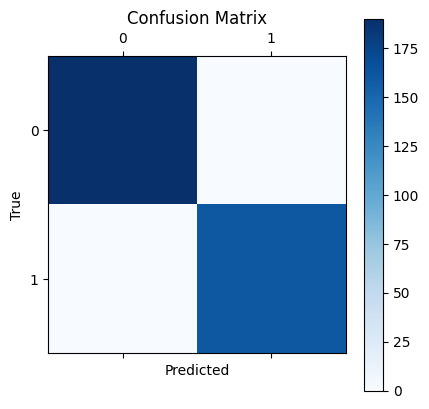

In [7]:
# Evaluating the model using accuracy and recall
accuracy = accuracy_score(y_test, y_val_pred)
recall = recall_score(y_test, y_val_pred, average='macro')  # 'macro' averages recall across classes

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Recall: {recall:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_val_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Plotting the confusion matrix
plt.matshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
joblib.dump(model, 'XGBClassifier_model.pkl')

['XGBClassifier_model.pkl']